# Prediksi Pasar Modal dengan LSTM dengan Dataset Baru

LSTM sangat efektif dalam memprediksi data sekuensial karena dapat menyimpan informasi masa lalu. Hal ini penting dalam kasus prediksi pasar modal karena harga saham sebelumnya sangat penting dalam memprediksi harga di masa depan.

## A.	Collecting the dataset

Dataset yang digunakan yaitu dataset harga saham General Electric yang didapatkan dari situs Yahoo! Finance (https://finance.yahoo.com/quote/GE/history?p=GE). Data tersebut memuat pergerakan harga saham GE selama 250 hari kerja, yakni dari tanggal 12 Nopember 2018 hingga tanggal 8 Nopember 2019. Contoh format dataset yang didapatkan dari situs Yahoo! Finance dapat dilihat pada Gambar 1. Dataset tersebut dipisahkan untuk keperluan training dan testing, dengan ketentuan sebagai berikut;
-	Data 7 Oktober 2019 hingga 8 Nopember 2019 (25 hari) digunakan sebagai data testing
-	Data 12 nopember 2018 hingga 4 Oktober 2019 (225 hari) digunakan sebagai data training
Masing - masing dataset disimpan dalam format CSV. Dataset testing disimpan dalam file GEtest.csv sedangkan dataset training disimpan dalam file NSE - GE.csv.

<img src="images/Capture2.png" style="width:500;height:300px;">
<caption><center> Gambar 1. Format dataset saham GE yang didapatkan dari situs Yahoo! Finance. </center></caption>

## B.	Import the libraries

Import beberapa packages yang akan digunakan yaitu;
-	Numpy untuk pengolahan data matematis.
-	Matplotlib untuk menggambar grafik
-	Pandas untuk memuat dan mengolah dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## C.	Loading the dataset

a.	Dataset yang akan digunakan untuk training adalah data harga saham GE dari waktu ke waktu. Data tersebut disimpan dalam file NSE-TATAGLOBAL.csv. Dataset tersebut mengandung beberapa kolom. Kolom Open adalah harga awal sedangkan kolom Close adalah harga akhir suatu saham pada hari perdagangan tertentu. Kolom High dan Low mewakili harga tertinggi dan terendah untuk hari tertentu. Hanya kolom Open yang akan digunakan sebagai training set.

In [4]:
dataset_train = pd.read_csv('NSE - GE.csv', sep = ';')
training_set = dataset_train.iloc[:, 1:2].values

b.	Menampilkan lima baris teratas dari dataset training, sekedar untuk memperjelas bentuk data yang akan digunakan.

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 04, 2019",8.61,8.70,8.54,8.57,8.57,"52,272,800"
1,"Oct 03, 2019",8.50,8.71,8.25,8.71,8.71,"58,626,600"
2,"Oct 02, 2019",8.56,8.62,8.41,8.51,8.51,"47,520,800"
3,"Oct 01, 2019",8.96,9.04,8.51,8.61,8.61,"68,778,600"
4,"Sep 30, 2019",9.08,9.10,8.94,8.94,8.94,"35,091,400"


## D.	Feature Scaling

Perlu dilakukan scaling pada data yang digunakan untuk mendapatkan performa model yang optimal. Pada tugas ini digunakan Scikit-Learn MinMaxScaler untuk memetakan data ke dalam skala antara nol dan satu.

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## E.	Creating Data with Timesteps

LSTM mensyaratkan data yang digunakan telah dikodekan dalam format tertentu, umumnya array 3D. Pertama-tama, data dibagi dalam 7 timesteps dan mengonversinya menjadi sebuah array menggunakan NumPy. Selanjutnya, data dikonversi menjadi array 3 dimensi dengan sampel X_train, 7 timestamp, dan satu fitur di setiap step.

In [7]:
X_train = []
y_train = []
for i in range(7, 225):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## F.	Building the LSTM

a.	Untuk membangun LSTM, perlu diimpor beberapa library dari Keras yaitu;
-	Sequential untuk membuat neural network.
-	Dense untuk membuat densely connected neural network layer
-	LSTM untuk membuat Long Short-Term Memory layer
-	Dropout untuk membuat dropout layers yang dapat mencegah overfitting


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


b.	Dibuat LSTM layer dengen beberapa argument yaitu;
-	50 units, yang menggambarkan dimensi output space
-	return_sequences=True, yang memerintahkan output terakhir dari output sequence dijadikan return value.
-	Input shape yang menggambarkan ukuran training set

Pada argumen pembuatan Dropout layer, didefinisikan nilai 0,2. Artinya, 20% dari layer akan dieliminasi. Kemudian, ditambahkan Dense layer yang mendefinisikan output dari satu unit. Model tersebut dicompile menggunakan Adam optimizer dan loss dihitung dengan mean_squared_error. Model dijalankan sebanyak 100 epoch dengan batch size sebesar 3. 


In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
218/218 [==============================] - 8s 36ms/step - loss: 0.0790
Epoch 2/100
218/218 [==============================] - 2s 11ms/step - loss: 0.0263
Epoch 3/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0214
Epoch 4/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0252
Epoch 5/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0200
Epoch 6/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0205
Epoch 7/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0191
Epoch 8/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0185
Epoch 9/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0202
Epoch 10/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0169
Epoch 11/100
218/218 [==============================] - 2

218/218 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 93/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 94/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 95/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 96/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 97/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 98/100
218/218 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 99/100
218/218 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 100/100
218/218 [==============================] - 1s 3ms/step - loss: 0.0054


## G.	Predicting Future Stock using the Test Set

a.	Setelah membangun model, sekarang saatnya untuk menguji kinerjanya. Pertama-tama, perlu diimpor test set yang akan digunakan untuk membuat prediksi. Dataset yang akan digunakan untuk testing disimpan dalam file tatatest.csv. File tersebut memiliki format yang sama dengan dataset training. Hanya kolom Open yang akan digunakan sebagai test set.


In [10]:
dataset_test = pd.read_csv('GEtest.csv', sep = ';')
real_stock_price = dataset_test.iloc[:, 1:2].values

b.	Untuk melakukan prediksi harga saham, kita perlu melakukan beberapa hal setelah memuat test set:
-	Gabungkan training set dan test set pada sumbu 0.
-	Atur time step sebesar 7 (seperti pada tahap sebelumnya)
-	Gunakan MinMaxScaler untuk mentransformasikan dataset baru tersebut
-	Kembalikan bentuk dataset menjadi bentuk sebelumnya
-	Setelah membuat prediksi, gunakan inverse_transform untuk mengembalikan harga saham ke dalam format yang mudah dibaca.


In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(7, 32):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## H.	Plotting the Result
Gunakan Matplotlib untuk memvisualisasikan harga saham hasil prediksi dan harga saham yang sebenarnya.

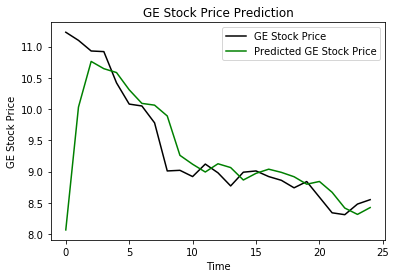

In [12]:
plt.plot(real_stock_price, color = 'black', label = 'GE Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted GE Stock Price')
plt.title('GE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GE Stock Price')
plt.legend()
plt.show()

Pada grafik tersebut dapat dilihat bahwa LSTM dapat memprediksi kenaikan dan penurunan harga saham GE. Dengan demikian, dapat disimpulkan bahwa LSTM dapat memprediksi data sekuensial secara akurat.

## I.	Tamat
